# An Illustrated Guide to the Poisson Regression Model

https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

Poisson Regression & Negative Binomial regression

https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/

PYMC3

https://docs.pymc.io/notebooks/GLM-poisson-regression.html32

In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


#Create a pandas DataFrame for the counts data set.
df = pd.read_csv('nyc_bb_bicyclist_counts.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

#Add a few derived regression variables.
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

#Create the training and testing data sets.
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""

#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['BB_COUNT']

#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

Training data set length=172
Testing data set length=42
                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  172
Model:                            GLM   Df Residuals:                      165
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12350.
Date:                Mon, 15 Jun 2020   Deviance:                       23043.
Time:                        17:20:23   Pearson chi2:                 2.37e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

# 108_GHP

In [ ]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Create a pandas DataFrame for the counts data set.
df = pd.read_csv(r'C:\Users\6506\Desktop\FDA\N428_後市場\108年GHP稽查不合格預測\GHP稽查不合格次數.csv', 
                 header=0, index_col=[0],encoding='ANSI')
df = df.dropna(axis=0)
#Create the training and testing data sets.
mask = np.random.rand(len(df)) < 0.8
df_train = pd.read_csv(r'C:\Users\6506\Desktop\FDA\N428_後市場\108年GHP稽查不合格預測\GHP稽查不合格次數_train_pred.csv', 
                       header=0, index_col=[0],encoding='ANSI')
df_test = pd.read_csv(r'C:\Users\6506\Desktop\FDA\N428_後市場\108年GHP稽查不合格預測\GHP稽查不合格次數_test_pred.csv', 
                      header=0, index_col=[0],encoding='ANSI')
df_train = df_train.dropna(axis=0)
df_test = df_test.dropna(axis=0)
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

expr = """GHP稽查初查不合格次數~
           資本總額元
           +C(實際營業地址_城市)
           +業別數
           +C(製造及加工)
           +C(餐飲業)
           +C(輸入業)
           +C(販售業)
           +C(實際營業地址同公司_商業登記地址_01)
           +C(市招名稱同公司_01)
           +C(是否有導入HACCP自主管理精神_01)
           +C(是否有導入ISO22000_01)
           +C(是否建立原材料來源及產品流向管理制度_01)
           +C(是否為上市上櫃公司_01)
           +C(有無設置實驗室_01)"""

#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson(),
                                  exposure=df_train['GHP稽查初查次數']).fit()

#Print the training summary.
print(poisson_training_results.summary())

#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['GHP稽查初查不合格次數']

#Mlot the predicted counts versus the actual counts for the test data.
# fig = plt.figure()
# fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
# predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
# actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
# plt.legend(handles=[predicted, actual])
# plt.show()

#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [ ]:
?X_train

In [ ]:
df_train['GHP稽查初查次數']

In [ ]:
predictions_summary_frame['mean'].max()

In [ ]:
poisson_training_results.family

In [ ]:
sm.stats.anova_lm(moore_lm, typ=2)

In [ ]:
poisson_training_results

In [ ]:
In [1]: import statsmodels.api as sm

In [2]: from statsmodels.formula.api import ols

In [3]: moore = sm.datasets.get_rdataset("Moore", "carData",
   ...:                                  cache=True) # load data
   ...: 

In [4]: data = moore.data

In [5]: data = data.rename(columns={"partner.status":
   ...:                             "partner_status"}) # make name pythonic
   ...: 

In [6]: moore_lm = ols('conformity ~ C(fcategory)+C(partner_status, Sum)',
   ...:                 data=data).fit()

In [ ]:
moore_lm.summary()

In [ ]:
data

# TEST

In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Create the training and testing data sets.
df0 = pd.read_csv('C:/Users/6506/Desktop/FDA/N428_後市場/SQL/dataset/製造.csv',header=0, index_col=[4],encoding='utf-8')
df=df0.fillna(0)
df=df.drop(columns=['縣市'])
df=df.drop(columns=['黑名單廠商'])

In [ ]:
df=df[df['稽查項目']=='GHP']
df=df[df['次類別']=='麵製品']

In [3]:
def key(x):
    return {
    '製造加工業': '製造',
    '輸入業': '輸入',
    '食品販賣業': '販售',
    '餐飲業': '餐飲',
    '物流業': '物流',
    }[x]

df['業別組合']=df['是否為製造加工業'].map(str)
for i in ['是否為餐飲業','是否為輸入業','是否為販售業','是否為物流業']:
    df['業別組合']+=df[i].map(str)
distinct=df['業別組合'].drop_duplicates().tolist()
industry=['、製造','、餐飲','、輸入','、販售','、物流']
for i in distinct:
    name='是否兼具'
    condition=df['業別組合'].notnull()
    for j in range(5):
        if i[j]=='1':
            name+=industry[j]
            condition=condition&(df['業別組合'].str[j]=='1')
#     condition=condition&(df['業別組合']==i)
    name+='業'
    name=name.replace('具、','具')
    if str.find(name,'製造')<0:
        df[name]=condition.astype(int)
# df.groupby(['業別組合'])['業別組合'].count()

In [4]:
#transform category variable type
# d=df.dtypes==object
# i=d[d==True].index[1:]
# df[i]=df[i].apply(lambda x: x.astype('category'))

In [5]:
startpoint=df.columns.get_loc('主類別數')
d=df.iloc[:,startpoint:].isin([0,1]).all()
cate=d[d==True].index
cont=d[d==False].index
# 扣掉業別組合
cont=cont[:-1]

In [6]:
#StandardScaler
from sklearn import preprocessing
# df['資本總額元']=preprocessing.StandardScaler().fit_transform(df[['資本總額元']])
# df[cont]=preprocessing.StandardScaler().fit_transform(df[cont])

In [7]:
train=df['TRAIN_總稽查次數']>0
test=df['TEST_總稽查次數']>0

In [8]:
# train=train & (df['稽查項目']=='GHP') & (df['次類別']=='麵製品')
# test=~train & (df['稽查項目']=='GHP') & (df['次類別']=='麵製品')
# df_train=df_train[(df_train['稽查項目']=='GHP')]
# test=test & (df['稽查項目']=='GHP') & (df['次類別']=='地區性特產食品')/
# test=~train & (df['稽查項目']=='GHP') & (df['次類別']=='餐盒食品')

In [9]:
# defect=lambda x:x['不合格次數']/x['總稽查次數']
defect=df['TRAIN_不合格次數']/df['TRAIN_總稽查次數']
TEST_defect=df['TEST_不合格次數']/df['TEST_總稽查次數']

In [10]:
from scipy.stats import spearmanr,ranksums,wilcoxon,mannwhitneyu,chisquare,mstats
np.seterr(invalid='ignore')
j=[]

for i in df.columns[startpoint:]:
    if i in cont:
        rk=spearmanr(defect[train],df[train][i]).pvalue
        j.append(rk)
    else:
        rk=ranksums(defect[train & (df[i]==1)],defect[train & (df[i]==0)]).pvalue
        j.append(rk)

In [11]:
verification = pd.DataFrame(j,index=df.columns[startpoint:],columns=['p-value']).fillna(1)
k=verification[verification['p-value']<0.05].index

In [12]:
capital=[df['資本總額元']<100000
         ,(df['資本總額元']>=100000) & (df['資本總額元']<1000000)
         ,(df['資本總額元']>=1000000) & (df['資本總額元']<10000000)
         ,(df['資本總額元']>=10000000) & (df['資本總額元']<30000000)
         ,df['資本總額元']>=30000000]
kruskal=mstats.kruskalwallis(defect[train & capital[0] ].tolist()
                     ,defect[train & capital[1]].tolist()
                     ,defect[train & capital[2]].tolist()
                     ,defect[train & capital[3]].tolist()
                     ,defect[train & capital[4]].tolist()).pvalue
if kruskal<0.05:
    for i in range(1,5):
        df['資本額'+str(i)]=capital[i].astype(int)
    d=df.iloc[:,startpoint:].isin([0,1]).all()
    cate=d[d==True].index
    k=k.append(df.columns[-4:])
    cont=cont.delete(cont.get_loc('資本總額元'))
    verification.loc['資本額級距']=kruskal
    
kruskal

7.464539787712224e-10

In [13]:
print('顯著因子='+str(len(verification[verification['p-value']<0.05])))
verification[verification['p-value']<0.05]
# print(verification.to_string())
# from IPython.display import display
# display(verification[verification['p-value']<0.05])

顯著因子=16


,p-value
是否為輸入業,1.577110e-02
資本總額元,2.455858e-03
是否為上市上櫃公司,2.184944e-02
是否依「食品業者投保產品責任保險」投保,1.664538e-02
同集團公司家數,1.973878e-02
工商登記異動頻次,4.981465e-03
廠商下游數量,5.820600e-03
逾期已交貨數,4.684087e-02
收貨未準時申報率,1.047589e-03
交貨未準時申報率,1.034899e-03


In [14]:
df_train = df[train]
df_test = df[test]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=2484
Testing data set length=1109


## 分類方法

In [15]:
#-------------------分類方法-------------------
df_train=df_train.reset_index()
compliant=df_train.loc[df_train.index.repeat(df_train['TRAIN_總稽查次數']-df_train['TRAIN_不合格次數'])]
unqualified=df_train.loc[df_train.index.repeat(df_train['TRAIN_不合格次數'])]
compliant['稽查結果'],unqualified['稽查結果']=0,1
df_train=pd.concat([compliant,unqualified]).set_index('業者名稱')

df_test=df_test.reset_index()
compliant=df_test.loc[df_test.index.repeat(df_test['TEST_總稽查次數']-df_test['TEST_不合格次數'])]
unqualified=df_test.loc[df_test.index.repeat(df_test['TEST_不合格次數'])]
compliant['稽查結果'],unqualified['稽查結果']=0,1
df_test=pd.concat([compliant,unqualified]).set_index('業者名稱')

expr = '稽查結果~'+'+'.join([i for i in k if i in cont])+''.join(["+C(Q('"+i+"'))" for i in k if i in cate])
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
X_train, X_test = X_train.align(X_test, join='inner', axis=1)
clf=RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred=clf.predict(X_test)
df_test['預測稽查結果']=y_pred
df_test['預測不合格率']=clf.predict_proba(X_test)[:,1]

C:\Users\6506\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [40]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[152  47]
 [ 52  56]]
Normalized confusion matrix
[[0.76 0.24]
 [0.48 0.52]]


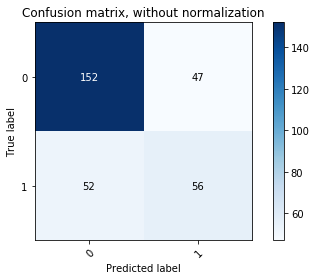

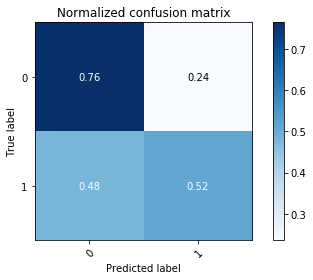

In [82]:
def Confusion_matrix(y_true, y_pred):
    class_names=unique_labels(y_true)

    np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()
Confusion_matrix(y_test.astype(int), y_pred)

## REG

                 Generalized Linear Model Regression Results                  
Dep. Variable:            TRAIN_不合格次數   No. Observations:                 2484
Model:                            GLM   Df Residuals:                     2465
Model Family:                 Poisson   Df Model:                           18
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2272.7
Date:                Mon, 28 Dec 2020   Deviance:                       2025.3
Time:                        13:54:27   Pearson chi2:                 1.89e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

<Figure size 432x288 with 0 Axes>

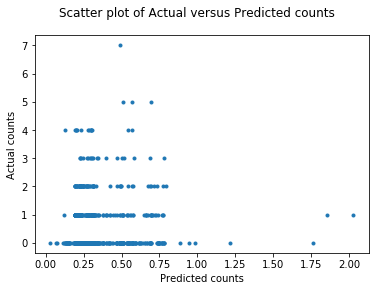

In [15]:
expr = 'TRAIN_不合格次數~'+'+'.join([i for i in k if i in cont])+''.join(["+C(Q('"+i+"'))" for i in k if i in cate])

#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
X_train, X_test = X_train.align(X_test, join='inner', axis=1)
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson(),
                                  exposure=df_train['TRAIN_總稽查次數']).fit()

#Print the training summary.
print(poisson_model.summary())

#Make some predictions on the test data set.
poisson_predictions = poisson_model.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']

#Mlot the predicted counts versus the actual counts for the test data.
# fig = plt.figure()
# fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
# predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
# actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
# plt.legend(handles=[predicted, actual])
# plt.show()

#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=y_test, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [16]:
# 因子係數與P-value
factor=pd.read_html(poisson_model.summary().tables[1].as_html(), header=0, index_col=0)[0]
for i in range(len(factor.index)):
    st=factor.index[i]
    if str.find(st,'\'')>0:st=st[str.find(st,'\'')+1:str.find(st,'\')')]
    factor=factor.rename(index={factor.index[i]:st})
factor[['coef','P>|z|']]

,coef,P>|z|
Intercept,-1.6348,0.000
是否為輸入業,-0.0024,0.041
是否為上市上櫃公司,-0.0329,0.000
是否依「食品業者投保產品責任保險」投保,0.0452,0.520
製造業廠商是否有脫水乾燥,0.1427,0.391
製造業廠商是否有烘焙炊蒸,0.1077,0.118
製造業廠商是否有食品安全監測計畫自檢表,-0.2057,0.015
高風險縣市,0.9155,0.000
資本額1,0.1867,0.018
資本額2,0.3020,0.000


In [17]:
#rate ratio
rate=X_train.copy()
for i in range(len(poisson_model._results.params)):
    rate.iloc[:,i]=rate.iloc[:,i]*poisson_model._results.params.to_list()[i]

ratio=rate.apply(lambda x: np.exp(x))

In [18]:
# st="C(Q('高風險縣市'))[T.1]"
# st[str.find(st,'\'')+1:str.find(st,'\')')]
dq=pd.DataFrame(ratio.iloc[:,1])
st=ratio.columns[1]
if str.find(st,'\'')>0:st=st[str.find(st,'\'')+1:str.find(st,'\')')]
dq['風險因子']=st
dq.columns = ['rateratio', '風險因子']

for i in range(2,len(ratio.columns)):
    dq2=pd.DataFrame(ratio.iloc[:,i])
    st=ratio.columns[i]
    if str.find(st,'\'')>0:st=st[str.find(st,'\'')+1:str.find(st,'\')')]
    dq2['風險因子']=st
    dq2.columns = ['rateratio', '風險因子']
    dq=dq.append(dq2)

In [19]:
NB_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=0.15),
                                  exposure=df_train['TRAIN_總稽查次數']).fit()
#Print the training summary.
print(NB_model.summary())

#Make some predictions on the test data set.
NB_predictions = NB_model.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = NB_predictions.summary_frame()
print(predictions_summary_frame)

NB_predicted_counts=predictions_summary_frame['mean']

                 Generalized Linear Model Regression Results                  
Dep. Variable:            TRAIN_不合格次數   No. Observations:                 2484
Model:                            GLM   Df Residuals:                     2465
Model Family:        NegativeBinomial   Df Model:                           18
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2292.1
Date:                Mon, 28 Dec 2020   Deviance:                       1853.1
Time:                        13:54:32   Pearson chi2:                 1.73e+03
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

C:\Users\6506\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\6506\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [20]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(max_depth=5).fit(X_train, y_train.values.ravel())
RF_predictions=RF_model.predict(X_test)

In [ ]:
# 模型的 p-value
poisson_training_results.pvalues
# 模型的 aic
poisson_training_results.aic
NB_training_results.aic

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_predictions = poisson_model.get_prediction(X_train).summary_frame()['mean']
NB_train_predictions = NB_model.get_prediction(X_train).summary_frame()['mean']
RF_train_predictions = RF_model.predict(X_train)
p_rmse=sqrt(mean_squared_error(train_predictions,defect[train]))
NB_rmse=sqrt(mean_squared_error(NB_train_predictions,defect[train]))
RF_rmse=sqrt(mean_squared_error(RF_train_predictions,defect[train]))
print(p_rmse,NB_rmse,RF_rmse)
p_weight=1-(p_rmse/(p_rmse+NB_rmse))
NB_weight=1-p_weight
print(p_weight,NB_weight)

0.397967982538079 0.3981500877117551 0.49261055191844016
0.5001143707073619 0.49988562929263813


C:\Users\6506\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [22]:
# 選定預測範圍
df_all=df_test
# df_all=df
y_test, X_test = dmatrices(expr, df_all, return_type='dataframe')
pred = poisson_model.get_prediction(X_test)
poi = pred.summary_frame()
poi.rename(columns={'mean':'P-預測不合格率'}, inplace=True)

pred = NB_model.get_prediction(X_test)
NB = pred.summary_frame()
NB.rename(columns={'mean':'NB-預測不合格率'}, inplace=True)

RF_predictions=poi['P-預測不合格率'].rename('RF-預測不合格率')*0+RF_model.predict(X_test)

poi[poi['P-預測不合格率']>1]=1
NB[NB['NB-預測不合格率']>1]=1

renew=poi['P-預測不合格率']*p_weight+NB['NB-預測不合格率']*NB_weight
# renew[renew>1]=1
score=round(renew*100).astype(int)-1
score[score==-1]=0

C:\Users\6506\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [23]:
p_rmse=sqrt(mean_squared_error(poi['P-預測不合格率'],TEST_defect[test]))
NB_rmse=sqrt(mean_squared_error(NB['NB-預測不合格率'],TEST_defect[test]))
weight_rmse=sqrt(mean_squared_error(renew,TEST_defect[test]))
print(p_rmse,NB_rmse,weight_rmse)

0.39367741212287627 0.39498599588092237 0.393754498412806


In [24]:
result=pd.concat([poi['P-預測不合格率'],NB['NB-預測不合格率'],RF_predictions,renew,score,df_all],axis=1)
result.rename(columns={0:'權重-預測不合格率',1:'風險等級'}, inplace=True)
result.to_excel(r'C:\Users\6506\Desktop\result.xls',encoding='ANSI')

In [25]:
#模擬隨機
# sample=lambda:TEST_defect[test].sample(frac=0.5)
sq_rand=[]
poi_rand=[]
NB_rand=[]
for i in range(10000):
    #bootstrap
    r_sample=result.sample(frac=0.5)
    r_test=r_sample['TEST_不合格次數']/r_sample['TEST_總稽查次數']
    poi_rand.append(sqrt(mean_squared_error(r_test,r_sample['權重-預測不合格率'])))
#     NB_rand.append(sqrt(mean_squared_error(r_test,r_sample['NB-預測不合格率']))) 
    #random+bootstrap
    sq_rand.append(sqrt(mean_squared_error(r_test,np.random.rand(len(r_test)))))

In [69]:
from collections import Counter
poi_count=Counter([round(i,2) for i in poi_rand])
sq_count=Counter([round(i,2) for i in sq_rand])
pd.DataFrame.from_dict(poi_count, orient='index').rename(columns={'index':'RMSE',0:'次數'}).reset_index()

,index,次數
0,0.44,2223
1,0.41,44
2,0.45,3041
3,0.47,972
4,0.46,2283
5,0.48,212
6,0.43,935
7,0.42,255
8,0.49,34
9,0.50,1


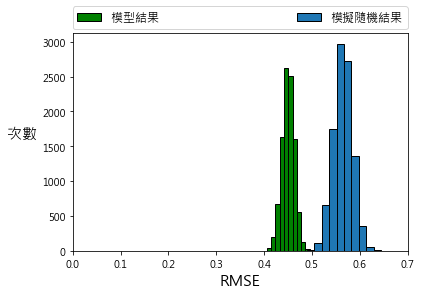

In [28]:
# plt.figure(figsize=(15,5))
plt.hist(poi_rand, label='模型結果 ',edgeColor = 'black',color='g', alpha = 1)
# plt.hist(NB_rand, label='Negative Binomial ',edgeColor = 'black',color='g', alpha = 0.5)
plt.hist(sq_rand, label='模擬隨機結果',edgeColor = 'black')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.xlim(0,0.7)
plt.xticks(np.arange(0,0.8,0.1))
plt.xlabel('RMSE', fontsize=15)
plt.ylabel('次數', fontsize=15,rotation=0,labelpad=20)
# plt.axvline(p_rmse, label='Poisson',linestyle='--',c='r')
# plt.axvline(NB_rmse, label='Negative Binomial',linestyle='--',c='g')
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), fontsize=12, loc="lower left",mode="expand", borderaxespad=0, ncol=4)
plt.show()

In [28]:
# 以下兩種方法二選一，是否要用分數區間(每10分)
# per=lambda x,y:(x>=np.percentile([x.min(),x.max()], y)) & (x<np.percentile([x.min(),x.max()], y+10)) if y<90 else x>=np.percentile([x.min(),x.max()], y)
per=lambda x,y:(x>=np.percentile(x, y)) & (x<np.percentile(x, y+10)) if y<90 else x>=np.percentile(x, y)
區間,次數,總數,風險等級=[],[],[],[]
x=result['權重-預測不合格率']
for i in range(0,100,10):
    區間.append(i)
    次數.append(result[per(x, i)]['TEST_不合格次數'].sum())
    總數.append(x.count()-per(x, i).value_counts()[0])
    風險等級.append(round(np.percentile(x, i)*100)-1)
#     風險等級.append(round(np.percentile([x.min(),x.max()], i)*100)-1)

In [33]:
x=result.sort_values(['權重-預測不合格率'])
區間,次數,總數,風險等級=[],[],[],[]
分割=[i for i in range(0,len(x),round(len(x)/10))]
分割.append(len(x)-1)

for i in range(0,10):
    區間.append(i*10)
    次數.append(x[分割[i]:分割[i+1]]['TEST_不合格次數'].astype(bool).sum())
    總數.append(len(x[分割[i]:分割[i+1]]))
    風險等級.append(str(x.iloc[分割[i],:]['風險等級'])+'-'+str(x.iloc[分割[i+1],:]['風險等級']))

In [34]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
percent = pd.DataFrame(data={'不合格家數': 次數,'總稽查家數':總數,'風險等級':風險等級},index=區間)
percent['風險等級'][percent['風險等級']==-1]=0
percent['百分等級']=[str(i)+'-'+str(i+10) for i in 區間]
percent['不合格率']=round(percent['不合格家數']*1.0/percent['總稽查家數'],3)
percent

C:\Users\6506\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,不合格家數,總稽查家數,風險等級,百分等級,不合格率
0,12,111,1-18,0-10,0.108
10,16,111,18-18,10-20,0.144
20,25,111,18-20,20-30,0.225
30,11,111,20-21,30-40,0.099
40,30,111,21-23,40-50,0.270
50,26,111,23-27,50-60,0.234
60,31,111,27-29,60-70,0.279
70,35,111,29-34,70-80,0.315
80,60,111,34-52,80-90,0.541
90,74,109,52-99,90-100,0.679


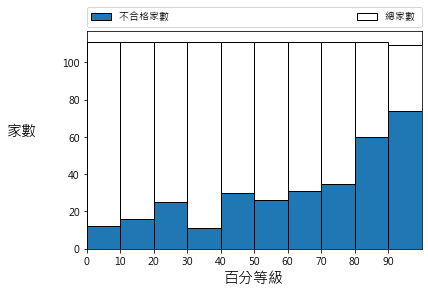

In [35]:
plt.bar(percent.index,percent['不合格家數'], label='不合格家數 ',edgeColor = 'black', width=10,align='edge')
plt.bar(percent.index,percent['總稽查家數']-percent['不合格家數'], label='總家數 ',edgeColor = 'black', width=10,align='edge',bottom=percent['不合格家數'],color='w')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.xlim(0,100)
plt.xticks(np.arange(0,100,10))
plt.xlabel('百分等級', fontsize=15)
plt.ylabel('家數', fontsize=15,rotation=0,labelpad=40)
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=4)

In [ ]:
# for i in np.arange(0,1,0.1):
#     print(i)

In [ ]:
result['不合格次數'][(result['預測不合格率']>0)&(result['預測不合格率']<0.2)]

In [ ]:
# def rank_test(covariates, groups):
#     colnames = list(covariates.columns)
#     J = len(colnames)
#     pvalues = np.zeros(J)
#     for j in range(J):
#         var = covariates[colnames[j]]
#         res = ranksums(var[groups == 1], var[groups == 0])
#         pvalues[j] = res.pvalue
#     return pvalues 

In [ ]:
df[df.columns[1]]

# package

In [1]:
import os
os.chdir('C:/Users/6506/Anaconda3/Lib/N428/')

## init

In [31]:
%%file __init__.py

# In[1]:


import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier

#Create the training and testing data sets.
def data_input(data):
    df0 = pd.read_csv('C:/Users/6506/Desktop/FDA/N428_後市場/SQL/dataset/'+data+'.csv',header=0, index_col=[4],encoding='utf-8')
    df=df0.fillna(0)
    df=df.drop(columns=['縣市'])
    df=df.drop(columns=['黑名單廠商'])
    return df
print('請選擇稽查項目\n 1.GHP 2.抽驗 3.標示')

def dic(x):
    return {
        '製造': data_input('製造'),
        '輸入': data_input('輸入'),
        '販賣': data_input('販賣'),
        '餐飲': data_input('餐飲'),
        '物流': data_input('物流'),
    }[x]

# In[2]:
def select_model(project=None,inspect=None,main=None,sec=None,sec2=None,count_total=None,count_fault=None,mode=None):
    
    warnings.filterwarnings("ignore")    
    
    # In[3]:
    df=dic(main)    
    df=df[df['稽查項目']==inspect]
    
    
    # In[45]:


    train=df['TRAIN_總稽查次數']>0
    test=df['TEST_總稽查次數']>0    
    
    # In[50]:
    if sec is not None:
        train=train &  (df['次類別']==sec)
        test=test &  (df['次類別']==sec)  
        
    if sec2 is not None:
        test=test &  (df['次類別']==sec2)
        sec=sec2
    # df_train=df_train[(df_train['稽查項目']=='GHP')]
    # test=test & (df['稽查項目']=='GHP') & (df['次類別']=='地區性特產食品')
    # test=~train & (df['稽查項目']=='GHP') & (df['次類別']=='餐盒食品')    

    
    # In[36]:


    df['業別組合']=df['是否為製造加工業'].map(str)
    for i in ['是否為餐飲業','是否為輸入業','是否為販售業','是否為物流業']:
        df['業別組合']+=df[i].map(str)
    distinct=df['業別組合'].drop_duplicates().tolist()
    industry=['、製造','、餐飲','、輸入','、販售','、物流']
    for i in distinct:
        name='是否兼具'
        condition=df['業別組合'].notnull()
        for j in range(5):
            if i[j]=='1':
                name+=industry[j]
                condition=condition&(df['業別組合'].str[j]=='1')
    #     condition=condition&(df['業別組合']==i)
        name+='業'
        name=name.replace('具、','具')
        df[name]=condition.astype(int)
    # df.groupby(['業別組合'])['業別組合'].count()


    # In[5]:


    #transform category variable type
    # d=df.dtypes==object
    # i=d[d==True].index[1:]
    # df[i]=df[i].apply(lambda x: x.astype('category'))


    # In[44]:


    startpoint=df.columns.get_loc('主類別數')
    d=df.iloc[:,startpoint:].isin([0,1]).all()
    cate=d[d==True].index
    cont=d[d==False].index
    # 扣掉業別組合
    cont=cont[:-1]


    # In[29]:


    #StandardScaler
    from sklearn import preprocessing
    # df['資本總額元']=preprocessing.StandardScaler().fit_transform(df[['資本總額元']])
    # df[cont]=preprocessing.StandardScaler().fit_transform(df[cont])


    # In[46]:


    # defect=lambda x:x['不合格次數']/x['總稽查次數']
    defect=(df['TRAIN_不合格次數']/df['TRAIN_總稽查次數']).fillna(0)
    TEST_defect=(df['TEST_不合格次數']/df['TEST_總稽查次數']).fillna(0)


    # In[47]:


    from scipy.stats import spearmanr,ranksums,wilcoxon,mannwhitneyu,chisquare,mstats
    np.seterr(invalid='ignore')
    j=[]

    for i in df.columns[startpoint:]:
        if i in cont:
            rk=spearmanr(defect[train],df[train][i]).pvalue
            j.append(rk)
        else:
            rk=ranksums(defect[train & (df[i]==1)],defect[train & (df[i]==0)]).pvalue
            j.append(rk)


    # In[48]:


    verification = pd.DataFrame(j,index=df.columns[startpoint:],columns=['p-value']).fillna(1)
    k=verification[verification['p-value']<0.05].index
    
    verification[verification['p-value']<0.05]
#     print(verification.to_string())


    # In[49]:


    capital=[df['資本總額元']<100000
             ,(df['資本總額元']>=100000) & (df['資本總額元']<1000000)
             ,(df['資本總額元']>=1000000) & (df['資本總額元']<10000000)
             ,(df['資本總額元']>=10000000) & (df['資本總額元']<30000000)
             ,df['資本總額元']>=30000000]
    try:
        kruskal=mstats.kruskalwallis(defect[train & capital[0] ].tolist()
                         ,defect[train & capital[1]].tolist()
                         ,defect[train & capital[2]].tolist()
                         ,defect[train & capital[3]].tolist()
                         ,defect[train & capital[4]].tolist()).pvalue
    except ZeroDivisionError:
        kruskal = 1
    except ValueError:
        kruskal = 1  
        
    if kruskal<0.05:
        for i in range(5):
            df['資本額'+str(i)]=capital[i].astype(int)
        d=df.iloc[:,startpoint:].isin([0,1]).all()
        cate=d[d==True].index
        k=k.append(df.columns[-5:])
        cont=cont.delete(cont.get_loc('資本總額元'))
        verification.loc['資本額級距']=kruskal
        
#     print('顯著因子='+str(len(verification[verification['p-value']<0.05])))
    
    if len(k)*10>len(df[train]):
        print('樣本數不足(%d*10>%d)，使用主類別建模'%(len(k),len(df[train])))
        select_model(project,inspect,main,sec=None,sec2=sec)
        return
        
    if len(k)==0:
        print('無顯著因子，使用主類別建模')
        return select_model(project,inspect,main,sec=None,sec2=sec)

    # In[50]:


    df_train = df[train]
    df_test = df[test]
#     print('Training data set length='+str(len(df_train)))
#     print('Testing data set length='+str(len(df_test)))

#--------------------------------------------------------------------------------------------------------------
    if mode is not None:
        df_train=df_train.reset_index()
        compliant=df_train.loc[df_train.index.repeat(df_train['TRAIN_總稽查次數']-df_train['TRAIN_不合格次數'])]
        unqualified=df_train.loc[df_train.index.repeat(df_train['TRAIN_不合格次數'])]
        compliant['稽查結果'],unqualified['稽查結果']=0,1
        df_train=pd.concat([compliant,unqualified]).set_index('業者名稱')

        df_test=df_test.reset_index()
        compliant=df_test.loc[df_test.index.repeat(df_test['TEST_總稽查次數']-df_test['TEST_不合格次數'])]
        unqualified=df_test.loc[df_test.index.repeat(df_test['TEST_不合格次數'])]
        compliant['稽查結果'],unqualified['稽查結果']=0,1
        df_test=pd.concat([compliant,unqualified]).set_index('業者名稱')

        expr = '稽查結果~'+'+'.join([i for i in k if i in cont])+''.join(["+C(Q('"+i+"'))" for i in k if i in cate])
        y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
        y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
        X_train, X_test = X_train.align(X_test, join='inner', axis=1)
        clf=RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        df_test['預測稽查結果']=y_pred
        return df_test

    # In[52]:


    expr = 'TRAIN_不合格次數~'+'+'.join([i for i in k if i in cont])+''.join(["+C(Q('"+i+"'))" for i in k if i in cate])

    #Set up the X and y matrices
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    X_train, X_test = X_train.align(X_test, join='inner', axis=1)
    #Using the statsmodels GLM class, train the Poisson regression model on the training data set.
    poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson(),
                                      exposure=df_train['TRAIN_總稽查次數']).fit()

    #Print the training summary.
#     print(poisson_model.summary())

    #Make some predictions on the test data set.
    poisson_predictions = poisson_model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
#     print(predictions_summary_frame)

    predicted_counts=predictions_summary_frame['mean']

    #Mlot the predicted counts versus the actual counts for the test data.
    # fig = plt.figure()
    # fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
    # predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    # actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
    # plt.legend(handles=[predicted, actual])
    # plt.show()

    #Show scatter plot of Actual versus Predicted counts
#     plt.clf()
#     fig = plt.figure()
#     fig.suptitle('Scatter plot of Actual versus Predicted counts')
#     plt.scatter(x=predicted_counts, y=y_test, marker='.')
#     plt.xlabel('Predicted counts')
#     plt.ylabel('Actual counts')
#     plt.show()


    # In[53]:


    NB_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=0.15),
                                      exposure=df_train['TRAIN_總稽查次數']).fit()
    #Print the training summary.
#     print(NB_model.summary())

    #Make some predictions on the test data set.
    NB_predictions = NB_model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = NB_predictions.summary_frame()
#     print(predictions_summary_frame)

    NB_predicted_counts=predictions_summary_frame['mean']


    # In[54]:    
    # RF的y要另外設定
    from sklearn.ensemble import RandomForestRegressor
    RF_model=RandomForestRegressor(max_depth=5).fit(X_train, defect[train].values.ravel())
    RF_predictions=RF_model.predict(X_test)

    
    # In[55]:


    from sklearn.metrics import mean_squared_error
    from math import sqrt
    p_train_predictions = poisson_model.get_prediction(X_train).summary_frame()['mean']
    NB_train_predictions = NB_model.get_prediction(X_train).summary_frame()['mean']
    RF_train_predictions = RF_model.predict(X_train)
    
    def standard(x):
        x:x[x>1]=1
        x:x[x<0]=0
    
    standard(p_train_predictions)
    standard(NB_train_predictions)
    standard(RF_train_predictions)
    
    p_rmse=sqrt(mean_squared_error(p_train_predictions,defect[train]))
    NB_rmse=sqrt(mean_squared_error(NB_train_predictions,defect[train]))
    RF_rmse=sqrt(mean_squared_error(RF_train_predictions,defect[train]))
    print(p_rmse,NB_rmse,RF_rmse)
    p_weight=(1/p_rmse)/(1/p_rmse+1/NB_rmse+1/RF_rmse)
    NB_weight=(1/NB_rmse)/(1/p_rmse+1/NB_rmse+1/RF_rmse)
    RF_weight=(1/RF_rmse)/(1/p_rmse+1/NB_rmse+1/RF_rmse)
#     print('poisson權重=',p_weight,'NB權重=',NB_weight)


    # In[56]:


    # 選定預測範圍
    df_all=df_test
    # df_all=df
    y_test, X_test = dmatrices(expr, df_all, return_type='dataframe')
    X_train, X_test = X_train.align(X_test, join='inner', axis=1)
    pred = poisson_model.get_prediction(X_test)
    poi = pred.summary_frame()
    poi.rename(columns={'mean':'P-預測不合格率'}, inplace=True)

    pred = NB_model.get_prediction(X_test)
    NB = pred.summary_frame()
    NB.rename(columns={'mean':'NB-預測不合格率'}, inplace=True)
    
    RF_predictions=poi['P-預測不合格率'].rename('RF-預測不合格率')*0+RF_model.predict(X_test)

    poi[poi['P-預測不合格率']>1],poi[poi['P-預測不合格率']<0]=1,0
    NB[NB['NB-預測不合格率']>1],NB[NB['NB-預測不合格率']<0]=1,0
    RF_predictions[RF_predictions>1],RF_predictions[RF_predictions<0]=1,0

    renew=poi['P-預測不合格率']*p_weight+NB['NB-預測不合格率']*NB_weight+RF_predictions*RF_weight
    # renew[renew>1]=1
    score=round(renew*100)-1
    score[score==-1]=0


    # In[58]:


    p_rmse=sqrt(mean_squared_error(poi['P-預測不合格率'],TEST_defect[test]))
    NB_rmse=sqrt(mean_squared_error(NB['NB-預測不合格率'],TEST_defect[test]))
    RF_rmse=sqrt(mean_squared_error(RF_predictions,TEST_defect[test]))
    weight_rmse=sqrt(mean_squared_error(renew,TEST_defect[test]))
    rand_rmse=sqrt(mean_squared_error(np.random.rand(len(TEST_defect[test])),TEST_defect[test]))
#     print('poisson RMSE=',p_rmse,'NB RMSE=',NB_rmse,'權重 RMSE=',weight_rmse)


    # In[59]:


    result=pd.concat([poi['P-預測不合格率'],NB['NB-預測不合格率'],RF_predictions,renew,score,df_all],axis=1)
    result.rename(columns={0:'權重-預測不合格率',1:'風險等級'}, inplace=True)
    result.to_excel(r'C:\Users\6506\Desktop\result.xls',encoding='ANSI')
    
    output = pd.DataFrame([inspect],columns=['稽查項目'])
    output['主類別'],output['次類別']=main,str(sec or '')+str(sec2 or '')
    output['訓練集'],output['測試集'],output['顯著因子']=len(df_train),len(df_test),len(verification[verification['p-value']<0.05])
    output['p_權重'],output['NB_權重'],output['RF_權重']=p_weight,NB_weight,RF_weight
    output['p_rmse'],output['NB_rmse'],output['RF_rmse'],output['加權後_rmse'],output['隨機_rmse']=p_rmse,NB_rmse,RF_rmse,weight_rmse,rand_rmse
    
    # getting number of nonzeros in each column is
    sort=result.sort_values('權重-預測不合格率',ascending=False)['TEST_不合格次數']
    output['模型不合格家數']=sort[0:count_total].astype(bool).sum(axis=0)
    output['應稽查家數']=sum(sort.astype(bool).cumsum()<count_fault)+1
    
    return output

Overwriting __init__.py


## execute

In [1]:
import os
import pandas as pd
os.chdir('C:/Users/6506/Anaconda3/Lib/N428/')

In [2]:
import N428

請選擇稽查項目
 1.GHP 2.抽驗 3.標示


In [3]:
N428.select_model(inspect='GHP',main='製造',sec='麵製品',count_fault=24,count_total=114)

0.3785186467877093 0.3785576076455297 0.35139338236652184


,稽查項目,主類別,次類別,訓練集,測試集,顯著因子,p_權重,NB_權重,RF_權重,p_rmse,NB_rmse,RF_rmse,加權後_rmse,隨機_rmse,模型不合格家數,應稽查家數
0,GHP,製造,麵製品,939,271,17,0.324982,0.324949,0.350069,0.442755,0.443844,0.43576,0.438112,0.574146,68,29


In [ ]:
N428.select_model(inspect='GHP',main='製造',sec='麵製品',mode=1)

In [ ]:
append_data=[]
for i in ['GHP','抽驗','標示']:
    for j in ['食用冰製造業','麵製品','烘焙食品','食品添加物','米及加工品']:
        append_data.append(N428.select_model(inspect=i,main='製造',sec=j))
pd.concat(append_data)

In [3]:
df = pd.read_excel(r'C:\Users\6506\Desktop\FDA\N428_後市場\SQL\各業別家數.xlsx',header=0,encoding='utf-8',sheet_name='工作表2')
append_data=[]
for i in range(0,16):
    append_data.append(N428.select_model(inspect=df['稽查項目'][i],main=df['主類別'][i],sec=df['次類別'][i]
                                        ,count_total=df['總稽查家數'][i],count_fault=df['不合格家數'][i]))
pd.concat(append_data)

0.3785186467877093 0.3785576076455297 0.35159801165627025
0.3672849561251738 0.3666906560858663 0.3633106764957897
0.3615459079089717 0.3610564174234935 0.33895186030853747
0.3873676919827543 0.3867164971182788 0.3810681686985692
0.26928617280152073 0.26926653184970206 0.24762887578996037
0.27733522591716125 0.2772936111156418 0.24383104286576732
0.38071034121766445 0.3785074452374524 0.37345525956326897
0.197018820391719 0.19726609998739322 0.1851959836883578
0.14176425045978053 0.14173754020400536 0.13900865455340736
0.19847478362979612 0.19785205040437248 0.18992757562697468
0.3903653336545186 0.38951045915007027 0.3859405444272709
0.14176425045978053 0.14173754020400536 0.13910281318680154
0.15058158807052582 0.1504593440445302 0.1436632493281826
0.32195584298640334 0.321675314774709 0.3181861386325473
0.32195584298640334 0.321675314774709 0.3182068995920594
0.30335869916837316 0.30334746623359854 0.2997022113508632


,稽查項目,主類別,次類別,訓練集,測試集,顯著因子,p_權重,NB_權重,RF_權重,p_rmse,NB_rmse,RF_rmse,加權後_rmse,隨機_rmse,模型不合格家數,應稽查家數
0,GHP,製造,麵製品,939,271,17,0.328596,0.328575,0.342829,0.442755,0.443844,0.435624,0.437821,0.535651,47,78
0,GHP,製造,食用冰製造業,145,84,3,0.332533,0.332845,0.334622,0.469701,0.468218,0.467847,0.467931,0.577898,22,73
0,GHP,製造,大豆製品,509,203,7,0.329364,0.329616,0.341020,0.362454,0.362642,0.364955,0.361047,0.512229,45,32
0,GHP,製造,烘焙食品,2565,920,9,0.332077,0.332430,0.335492,0.383437,0.383948,0.385867,0.383850,0.570225,116,183
0,GHP,製造,其他食品用器具,450,61,4,0.330069,0.330078,0.339852,0.266796,0.266692,0.264520,0.265472,0.586522,4,2
0,GHP,製造,食品添加物,259,75,4,0.328254,0.328273,0.343473,0.326186,0.325430,0.324217,0.323117,0.589382,12,76
0,GHP,製造,醃漬蔬果,317,100,2,0.331645,0.332825,0.335530,0.278149,0.280772,0.300183,0.284609,0.622988,14,14
0,GHP,販賣,一般超市,2213,817,9,0.331739,0.331637,0.336624,0.167843,0.167656,0.167946,0.166876,0.570819,24,340
0,抽驗,販賣,雜貨,2177,695,4,0.332974,0.332984,0.334043,0.168890,0.168909,0.172534,0.169723,0.572619,27,56
0,標示,販賣,其他食品販賣業,5866,1285,12,0.332067,0.332325,0.335608,0.238089,0.237140,0.232443,0.235107,0.587409,19,1


# print data

In [ ]:
print('\n'.join("+C(Q('"+df_train.columns[6:]+"'))"))

In [ ]:
''.join("IIF(faden.["+df_train.columns[8:]+"] = 'Y', 1, 0) '"+df_train.columns[8:]+"',") 

In [ ]:
'不合格次數~'+''.join("+C(Q('"+df.columns[k]+"'))")

print SQL

In [ ]:
import pandas as pd
df = pd.read_csv(r'C:\Users\6506\Desktop\PSA.csv', 
                       header=0, encoding='ANSI',converters={'column_name': lambda x: str(x)})
df['factor']=df['factor'].apply(lambda x: '{0:0>3}'.format(x))
for i in range(len(df)):
#     print('left join  [FRBDM2].[dbo].['+df.iloc[i,1]+'] factor_'+df.iloc[i,0]+' on factor_'+df.iloc[i,0]+'.報驗義務人統一編號=trader.統一編號')
#     print('OUTER APPLY(SELECT TOP (1) f.'+df.iloc[i,1]+'    FROM [FRBDM2].[dbo].['+df.iloc[i,1]+'] f    WHERE f.報驗義務人統一編號 = trader.統一編號    ORDER BY '+df.iloc[i,1]+' DESC) factor_'+df.iloc[i,0])
    print(',factor_'+df.iloc[i,0])

In [45]:
import itertools as iter
list(combinations(range(5),2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [32]:
s = 'abc'
results = sorted([''.join(c) for l in range(len(s)) for c in permutations(s, l+1)])
results

['a',
 'ab',
 'abc',
 'ac',
 'acb',
 'b',
 'ba',
 'bac',
 'bc',
 'bca',
 'c',
 'ca',
 'cab',
 'cb',
 'cba']

In [64]:
A=['0','1']
A=[a+b+c+d+e for e in A for d in A for c in A for b in A for a in A]
industry=['、製造','、餐飲','、輸入','、販售','、物流']
for i in A:
    name='是否兼具'
    for j in range(5):
        if i[j]=='1':
            name+=industry[j]
    name+='業'
    name=name.replace('具、','具')
    print(name)

是否兼具業
是否兼具製造業
是否兼具餐飲業
是否兼具製造、餐飲業
是否兼具輸入業
是否兼具製造、輸入業
是否兼具餐飲、輸入業
是否兼具製造、餐飲、輸入業
是否兼具販售業
是否兼具製造、販售業
是否兼具餐飲、販售業
是否兼具製造、餐飲、販售業
是否兼具輸入、販售業
是否兼具製造、輸入、販售業
是否兼具餐飲、輸入、販售業
是否兼具製造、餐飲、輸入、販售業
是否兼具物流業
是否兼具製造、物流業
是否兼具餐飲、物流業
是否兼具製造、餐飲、物流業
是否兼具輸入、物流業
是否兼具製造、輸入、物流業
是否兼具餐飲、輸入、物流業
是否兼具製造、餐飲、輸入、物流業
是否兼具販售、物流業
是否兼具製造、販售、物流業
是否兼具餐飲、販售、物流業
是否兼具製造、餐飲、販售、物流業
是否兼具輸入、販售、物流業
是否兼具製造、輸入、販售、物流業
是否兼具餐飲、輸入、販售、物流業
是否兼具製造、餐飲、輸入、販售、物流業
